# Sentence Classification using Stacked Bidirectional LSTM

Trained a **Stacked Bidirectional LSTM Network** for the task of sequence classification on the dataset available here: https://github.com/AcademiaSinicaNLPLab/sentiment_dataset 

Used **TREC question dataset**, which involves classifying a question into 6 question types (whether the question is about person, location, numeric information, etc.)

In [31]:
import pandas as pd
import keras
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, Activation, LSTM, Bidirectional
from keras.regularizers import l2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
corpus = pd.read_pickle('./sentiment_dataset/TREC.pkl')
sentences, labels = list(corpus.sentence), list(corpus.label)

In [130]:
#set params
vocab_dictionary = 1000
max_seq_len = 20
embedding_size = 300
batch_size = 64
epochs = 10
hidden_dims = 20

In [131]:
#preprocessing
token = Tokenizer(num_words=vocab_dictionary)
token.fit_on_texts(sentences)
x = token.texts_to_sequences(sentences)
x = sequence.pad_sequences(x, maxlen=max_seq_len)
y = to_categorical(labels)
print(x.shape)
print(y.shape)

(5952, 20)
(5952, 6)


In [138]:
#buiding model
model = Sequential()

model.add(Embedding(input_dim=vocab_dictionary,
                    output_dim=embedding_size,
                   input_length=max_seq_len))

model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units=100,
                             dropout=0.4, 
                             recurrent_dropout=0.3,
                             kernel_regularizer=l2(0.02),
                             recurrent_regularizer=l2(0.02),
                             return_sequences=True)))

model.add(Bidirectional(LSTM(units=50,
                             dropout=0.2, 
                             recurrent_dropout=0.2,
                             kernel_regularizer=l2(0.02),
                             recurrent_regularizer=l2(0.02),
                             return_sequences=False)))

# model.add(Dense(units=hidden_dims,
#                activation='relu',
#                kernel_regularizer=l2(0.1)))

# model.add(Dropout(0.2))

model.add(Dense(units=6,
               activation='softmax'))

In [139]:
#compile model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 20, 300)           300000    
_________________________________________________________________
dropout_44 (Dropout)         (None, 20, 300)           0         
_________________________________________________________________
bidirectional_41 (Bidirectio (None, 20, 200)           320800    
_________________________________________________________________
bidirectional_42 (Bidirectio (None, 100)               100400    
_________________________________________________________________
dense_43 (Dense)             (None, 6)                 606       
Total params: 721,806
Trainable params: 721,806
Non-trainable params: 0
_________________________________________________________________
None


In [140]:
#model fitting
history = model.fit(x, y,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)

Train on 4761 samples, validate on 1191 samples
Epoch 1/10
4761/4761 [==============================] - 43s 9ms/step - loss: 6.9818 - acc: 0.2668 - val_loss: 2.5808 - val_acc: 0.4509
Epoch 2/10
4761/4761 [==============================] - 15s 3ms/step - loss: 1.4936 - acc: 0.5879 - val_loss: 0.9795 - val_acc: 0.6969
Epoch 3/10
4761/4761 [==============================] - 17s 4ms/step - loss: 0.7572 - acc: 0.7614 - val_loss: 0.7276 - val_acc: 0.7632
Epoch 4/10
4761/4761 [==============================] - 15s 3ms/step - loss: 0.5597 - acc: 0.8294 - val_loss: 0.6302 - val_acc: 0.7809
Epoch 5/10
4761/4761 [==============================] - 15s 3ms/step - loss: 0.4580 - acc: 0.8664 - val_loss: 0.6730 - val_acc: 0.7884
Epoch 6/10
4761/4761 [==============================] - 16s 3ms/step - loss: 0.3889 - acc: 0.8822 - val_loss: 0.6003 - val_acc: 0.8111
Epoch 7/10
4761/4761 [==============================] - 14s 3ms/step - loss: 0.3388 - acc: 0.8994 - val_loss: 0.6040 - val_acc: 0.8102
Epoch 8

Text(0.5,1,'Train vs Validation Loss')

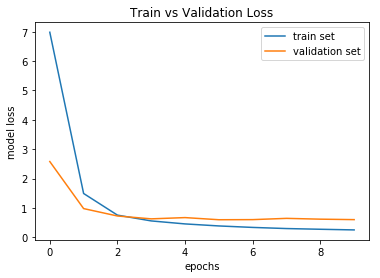

In [141]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('model loss')
plt.legend(['train set', 'validation set'], loc='best')
plt.title('Train vs Validation Loss')

Text(0.5,1,'Train vs Validation Accuracy')

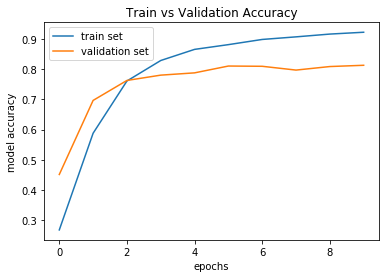

In [142]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('model accuracy')
plt.legend(['train set', 'validation set'], loc='best')
plt.title('Train vs Validation Accuracy')